# Artificial Intelligence Course, Dr.Fadaei
# CA#5 P2 - Neural Network using TensorFlow & keras
## Parnian Fazel - 810198516

###Goal & Brief Description:
Neural networks are one of the most powerful machine structures that in recent years due to the increasing computing power of processors has found numerous applications in various scientific and industrial fields. One of the features of these algorithms is that it is possible to construct any derivative function of the desired acceptance by using only two hidden layers of neurons. Therefore, it is possible to implement other functions with its help. Due to the subsequent advances of this structure and its increasing application in the industry, very strong frameworks have been offered to facilitate the creation of very complex and highly efficient neural networks. In this project we intend to use the `TensorFlow` library and the `Keras` high-level interface to address some network issues. In this problem, we intend to use neural networks based on the image of an animal to identify the type of that animal. Wildlife Database is a wildlife image dataset. In this exercise, we will train a neural network with 4 classes of **Elk**, **Raccoon**, **Raven** and **Bald Eagle** from this data set. 

###Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!cp "/content/drive/MyDrive/Term 5/AI/CA5-P2/dataset.zip" .
!unzip "/content/drive/MyDrive/Term 5/AI/CA5-P2/dataset.zip"

Archive:  /content/drive/MyDrive/Term 5/AI/CA5-P2/dataset.zip
   creating: dataset/test/
   creating: dataset/test/bald_eagle/
  inflating: dataset/test/bald_eagle/023396cb25b3c3b42b.jpg  
  inflating: dataset/test/bald_eagle/051341685b28ada745.jpeg  
  inflating: dataset/test/bald_eagle/056c89e037e83fea0b.jpg  
  inflating: dataset/test/bald_eagle/05b4bbcee0cac47380.jpg  
  inflating: dataset/test/bald_eagle/0781c8c5da9a997d50.jpg  
  inflating: dataset/test/bald_eagle/0a6bf3fa0a0d17aed4.jpg  
  inflating: dataset/test/bald_eagle/0affaa5e5d0cd767f9.jpg  
  inflating: dataset/test/bald_eagle/0c9f5bd60c204a39a6.jpg  
  inflating: dataset/test/bald_eagle/0ca38898bfbf707dc5.jpg  
  inflating: dataset/test/bald_eagle/0cfacfed56630d7875.jpg  
  inflating: dataset/test/bald_eagle/0d11cf0159847e90be.jpg  
  inflating: dataset/test/bald_eagle/0d794c49513ad0fdea.jpg  
  inflating: dataset/test/bald_eagle/0ef2b2fb71abab4e2e.png  
  inflating: dataset/test/bald_eagle/0f31be490a342c1de0.jpg  
  in

--------------
##Phase 1: Preprocessing

In [7]:
data_generator = preprocessing.image.ImageDataGenerator(
    validation_split=0.3,
    rescale=1/255.0)

un_shuffled_train_data = data_generator.flow_from_directory(
    "/content/dataset/train",
    target_size=(100, 100),
    subset='training',
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)
train_data = data_generator.flow_from_directory(
    "/content/dataset/train",
    target_size=(100, 100),
    subset='training',
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=32
)
un_shuffled_validation_data = data_generator.flow_from_directory(
    "/content/dataset/train",
    target_size=(100, 100),
    subset='validation',
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)
validation_data = data_generator.flow_from_directory(
    "/content/dataset/train",
    target_size=(100, 100),
    subset='validation',
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=32
)

Found 1363 images belonging to 4 classes.
Found 1363 images belonging to 4 classes.
Found 582 images belonging to 4 classes.
Found 582 images belonging to 4 classes.


I used 30% of total train data for validation set. As we can see there are 1363 data for training and 582 data for validation set. There are 4 classes for each.

In [8]:
validation_data.class_indices

{'bald_eagle': 0, 'elk': 1, 'racoon': 2, 'raven': 3}

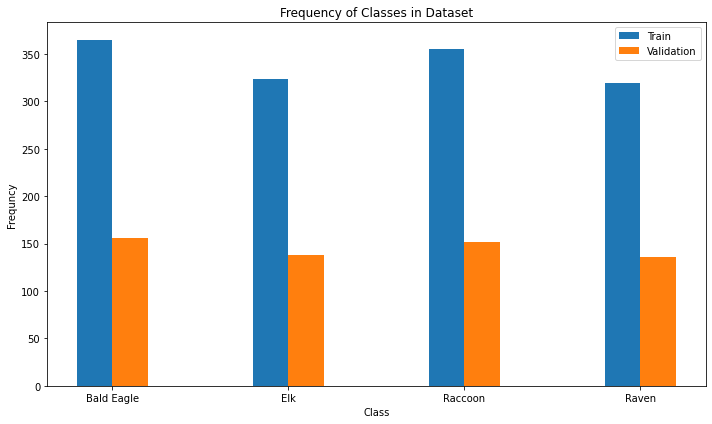

In [9]:
train_classes_freq = np.bincount(train_data.classes)
validation_classes_freq = np.bincount(validation_data.classes)


labels = ["Bald Eagle", "Elk", "Raccoon", "Raven"]
y_pos = np.arange(len(labels))
width = 0.2
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
plt.bar(y_pos - width/2, train_classes_freq, width, label='Train')
plt.bar(y_pos + width/2, validation_classes_freq, width, label='Validation')
plt.xticks(y_pos, labels)
plt.title("Frequency of Classes in Dataset")
plt.ylabel("Frequncy")
plt.xlabel("Class")
plt.legend()
fig.tight_layout()
plt.show()

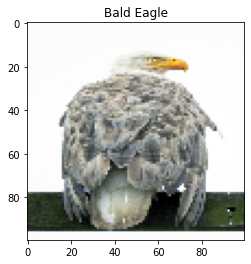

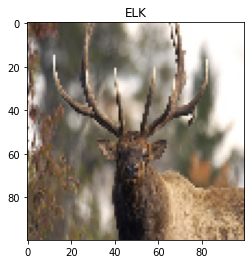

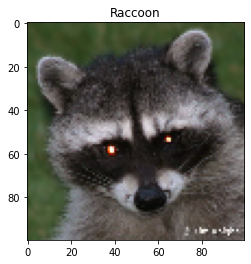

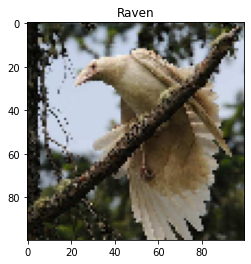

In [10]:
img = preprocessing.image.load_img("/content/dataset/train/bald_eagle/d7a59b6e4b8307a9ec.jpg", target_size=(100, 100))
imgplot = plt.imshow(img)
plt.title("Bald Eagle")
plt.show()

img = preprocessing.image.load_img("/content/dataset/train/elk/71d43626a126a4c8c0.jpg", target_size=(100, 100))
imgplot = plt.imshow(img)
plt.title("ELK")
plt.show()

img = preprocessing.image.load_img("/content/dataset/train/racoon/5ed82b2163f6fdc2ec.jpg", target_size=(100, 100))
imgplot = plt.imshow(img)
plt.title("Raccoon")
plt.show()

img = preprocessing.image.load_img("/content/dataset/train/raven/bc1f4aaaf892fbf95b.jpg", target_size=(100, 100))
imgplot = plt.imshow(img)
plt.title("Raven")
plt.show()

**One hot encoding:**
For categorical variables where no such ordinal relationship exists, One hot hot encoding is better than integer encoding. Otherwise it clus lead us to poor performance. This type of encoding creates a new binary feature for each possible category and assigns a value of 1 to the feature of each sample that corresponds to its original category. One-Hot-Encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. Since there is no quantitative relationship between nominal variables' individual values, using ordinal encoding can potentially create a fictional ordinal relationship in the data.[8] Therefore, one-hot encoding is often applied to nominal variables, in order to improve the performance of the algorithm. In this project as the classes are not ordinal and the number of classes are not alot, using one hot encoding is good. Alse, by using one hot encoding here, sumhow we are preventing our model to get biased. By using other types of encoding like integer encoding we are settin a rank between classes, but here there is no rank between animals so one hot encoding is a better encoding method.


---------------
##Phase 2: Modeling the Neural Network

In [ ]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(2048, activation='relu')(output)
output = keras.layers.Dense(1024, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu = model.fit(train_data, validation_data=validation_data , epochs=10)

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_34 (Flatten)        (None, 10000)             0         
                                                                 
 dense_103 (Dense)           (None, 2048)              20482048  
                                                                 
 dense_104 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_105 (Dense)           (None, 4)                 4100      
                                                                 
Total params: 22,584,324
Trainable params: 22,584,324
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/10
49/49 [==============================] - 57s 1s/step - loss: 1.4738 - accuracy: 0.3687 - val_loss: 1.1629 - val_accuracy: 0.5180
Epoch 2/10
49/49 [==============================] - 55s 1s/step - loss: 1.1825 - accuracy: 0.4759 - val_loss: 1.2476 - val_accuracy: 0.4175
Epoch 3/10
49/49 [==============================] - 56s 1s/step - loss: 1.0932 - accuracy: 0.5299 - val_loss: 1.1289 - val_accuracy: 0.5361
Epoch 4/10
49/49 [==============================] - 55s 1s/step - loss: 1.0469 - accuracy: 0.5684 - val_loss: 1.1778 - val_accuracy: 0.3995
Epoch 5/10
49/49 [==============================] - 55s 1s/step - loss: 1.0180 - accuracy: 0.5845 - val_loss: 1.0175 - val_accuracy: 0.5464
Epoch 6/10
49/49 [==============================] - 55s 1s/step - loss: 0.9764 - accuracy: 0.6005 - val_loss: 1.1856 - val_accuracy: 0.4485
Epoch 7/10
49/49 [==============================] - 55s 1s/step - loss: 0.9149 - accuracy: 0.6288 - val_loss: 1.0739 - val_accuracy: 0.5464
Epoch 8/10
49/49 [==

Here based on the summary, the parameter 20482048 comes from here:

100 \* 100 * 2048 + 2048(number of biases) = 2048

and the parameter 2098176 comes from here:

2048 * 1024 + 1024 = 2098176

and the parameter 4100 comes from here:

1024 * 4 + 4 = 4100


In [ ]:
def print_results(modell, train_generator, validation_generator):
  print("----->TRAIN")
  pred = np.argmax(modell.predict(train_generator, batch_size=32), axis=1)
  print(classification_report(train_generator.labels, pred))
  print("---->Validation")
  pred = np.argmax(modell.predict(validation_generator, batch_size=32), axis=1)
  print(classification_report(validation_generator.labels, pred))

print_results(model,un_shuffled_train_data, un_shuffled_validation_data )

In [ ]:
  def plot_results(hist):
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(8)
    plt.plot(hist.history["accuracy"], label = "Train")
    plt.plot(hist.history["val_accuracy"], label ="Validation")
    plt.title("Accuracy of Train and validation Data")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(8)
    plt.plot(hist.history["loss"], label = "Train")
    plt.plot(hist.history["val_loss"], Label = "Validation")
    plt.title("Loss of Train and validation Data")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

  plot_results(history_relu)

----------------
##Phase 3
###Effect of Optimizer
### Momentum
In the context of SGD, instead of computing the exact derivate of our loss function, we’re approximating it on small batches in an iterative fashion. Hence, it is not certain that the model learns in a direction where the loss is minimized. To propose more stable, direction-aware, and fast learning, we introduce SGDMomentum that determines the next update as a linear combination of the gradient and the previous update. Hence, it takes into account the previous updates also.
In general, momentum stochastic gradient descent provides 2 certain advantages over classical one:
  * Fast convergence
  * Less oscillatory training

momentum coefficient takes values in [0,1]. It is an exponential decay factor that determines the relative contribution of the current gradient and earlier gradients to the weight change [1]. A momentum of 0.0 is the same as gradient descent without momentum. In the case of momentum = 1, the optimization process takes into account the full history of the previous update.

The method of momentum is designed to accelerate learning, especially in the face of high curvature, small but consistent gradients, or noisy gradients. Also, it helps us not to get in local minima.

**Momentum = 0.5**

In [ ]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(4096, activation='relu')(output)
output = keras.layers.Dense(2048, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.5), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu_momentum05 = model.fit(train_data, validation_data=validation_data , epochs=10)

Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 flatten_26 (Flatten)        (None, 16384)             0         
                                                                 
 dense_79 (Dense)            (None, 4096)              67112960  
                                                                 
 dense_80 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_81 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 75,511,812
Trainable params: 75,511,812
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 68s 1s/step - loss: 1.5427 - accuracy: 0.3802 - val_loss: 1.1382 - val_accuracy: 0.5619
Epoch 2/10
49/49 [==============================] - 66s 1s/step - loss: 1.1629 - accuracy: 0.5138 - val_loss: 1.1808 - val_accuracy: 0.5000
Epoch 3/10
49/49 [==============================] - 66s 1s/step - loss: 1.0898 - accuracy: 0.5234 - val_loss: 1.0402 - val_accuracy: 0.5515
Epoch 4/10
49/49 [==============================] - 66s 1s/step - loss: 1.0269 - accuracy: 0.5761 - val_loss: 1.0164 - val_accuracy: 0.5619
Epoch 5/10
49/49 [==============================] - 67s 1s/step - loss: 0.9446 - accuracy: 0.6134 - val_loss: 0.9830 - val_accuracy: 0.6031
Epoch 6/10
49/49 [==============================] - 67s 1s/step - loss: 0.8934 - accuracy: 0.6493 - val_loss: 1.0178 - val_accuracy: 0.5541
Epoch 7/10
49/49 [==============================] - 67s 1s/step - loss: 0.8256 - accuracy: 0.6737 - val_loss: 0.9359 - val_accuracy: 0.6340
Epoch 8/10
49/49 [=============

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.55      0.59      0.57       417
           1       0.61      0.86      0.71       370
           2       0.73      0.76      0.74       406
           3       0.81      0.37      0.51       364

    accuracy                           0.65      1557
   macro avg       0.67      0.64      0.63      1557
weighted avg       0.67      0.65      0.63      1557

---->Validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.52      0.60      0.56       104
           1       0.57      0.79      0.66        92
           2       0.62      0.64      0.63       101
           3       0.84      0.34      0.48        91

    accuracy                           0.60       388
   macro avg       0.64      0.59      0.58       388
weighted avg       0.63      0.60      0.59       388



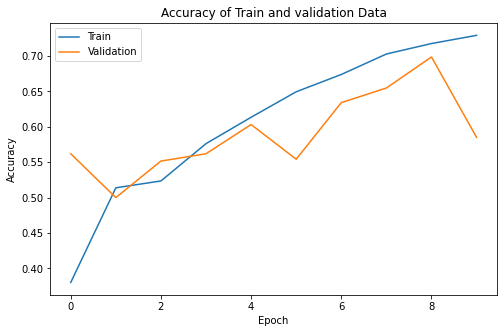

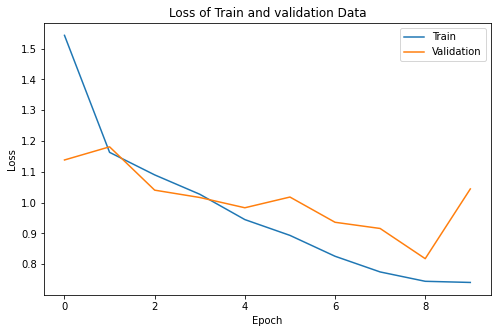

In [ ]:
print_results(model,un_shuffled_train_data, un_shuffled_validation_data)
plot_results(history_relu_momentum05)

**Momentum = 0.9**

In [ ]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(4096, activation='relu')(output)
output = keras.layers.Dense(2048, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu_momentum09 = model.fit(train_data, validation_data=validation_data , epochs=10)

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 flatten_27 (Flatten)        (None, 16384)             0         
                                                                 
 dense_82 (Dense)            (None, 4096)              67112960  
                                                                 
 dense_83 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_84 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 75,511,812
Trainable params: 75,511,812
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
 9/49 [====>.......................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 68s 1s/step - loss: 1.9823 - accuracy: 0.3224 - val_loss: 1.3425 - val_accuracy: 0.3557
Epoch 2/10
49/49 [==============================] - 67s 1s/step - loss: 1.2700 - accuracy: 0.4027 - val_loss: 1.1830 - val_accuracy: 0.4485
Epoch 3/10
49/49 [==============================] - 67s 1s/step - loss: 1.1961 - accuracy: 0.4399 - val_loss: 1.1616 - val_accuracy: 0.4923
Epoch 4/10
49/49 [==============================] - 67s 1s/step - loss: 1.1419 - accuracy: 0.4618 - val_loss: 1.0936 - val_accuracy: 0.5103
Epoch 5/10
49/49 [==============================] - 67s 1s/step - loss: 1.1143 - accuracy: 0.5100 - val_loss: 1.0835 - val_accuracy: 0.5722
Epoch 6/10
49/49 [==============================] - 67s 1s/step - loss: 1.1042 - accuracy: 0.4952 - val_loss: 1.0842 - val_accuracy: 0.5515
Epoch 7/10
49/49 [==============================] - 66s 1s/step - loss: 1.0882 - accuracy: 0.5138 - val_loss: 1.0016 - val_accuracy: 0.5954
Epoch 8/10
49/49 [=============

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.55      0.59      0.57       417
           1       0.61      0.86      0.71       370
           2       0.73      0.76      0.74       406
           3       0.81      0.37      0.51       364

    accuracy                           0.65      1557
   macro avg       0.67      0.64      0.63      1557
weighted avg       0.67      0.65      0.63      1557

---->Validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.52      0.60      0.56       104
           1       0.57      0.79      0.66        92
           2       0.62      0.64      0.63       101
           3       0.84      0.34      0.48        91

    accuracy                           0.60       388
   macro avg       0.64      0.59      0.58       388
weighted avg       0.63      0.60      0.59       388



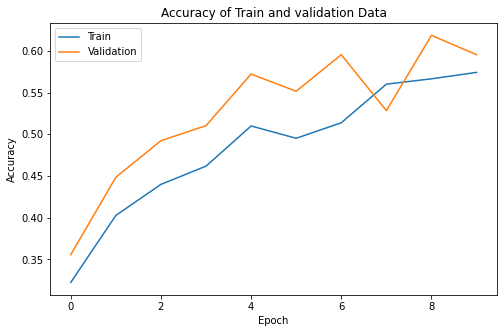

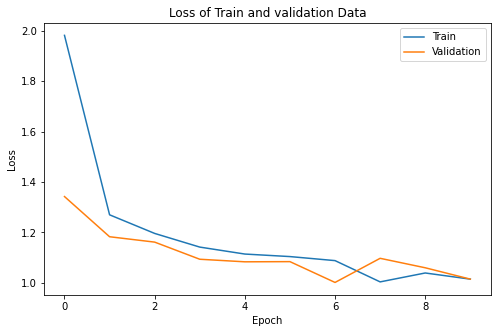

In [ ]:
print_results(model,un_shuffled_train_data, un_shuffled_validation_data )
plot_results(history_relu_momentum09)

**Question) is it always good to set momentum at high value?**

No, generally to set momentum at most 0.9 would not be bad but by setting momentum at high value like 0.95 and also we set learning rate to a high value, we would have bigger steps, hence, the each step will be bigger. Therefore, weights in the network would not be updated in a correct way, and they will never reach optimal values. Therefore, large momentum does not necessarily lead to higher accuracies.

**Adam**

In [ ]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(4096, activation='relu')(output)
output = keras.layers.Dense(2048, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu_adam = model.fit(train_data, validation_data=validation_data , epochs=10)

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 128, 128, 1)]     0         
                                                                 
 flatten_28 (Flatten)        (None, 16384)             0         
                                                                 
 dense_85 (Dense)            (None, 4096)              67112960  
                                                                 
 dense_86 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_87 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 75,511,812
Trainable params: 75,511,812
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
11/49 [=====>......................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 75s 2s/step - loss: 10.6317 - accuracy: 0.3192 - val_loss: 1.2812 - val_accuracy: 0.4330
Epoch 2/10
49/49 [==============================] - 69s 1s/step - loss: 1.2311 - accuracy: 0.4252 - val_loss: 1.1583 - val_accuracy: 0.5077
Epoch 3/10
49/49 [==============================] - 69s 1s/step - loss: 1.1995 - accuracy: 0.4566 - val_loss: 1.2555 - val_accuracy: 0.4562
Epoch 4/10
49/49 [==============================] - 69s 1s/step - loss: 1.1905 - accuracy: 0.4457 - val_loss: 1.2091 - val_accuracy: 0.4691
Epoch 5/10
49/49 [==============================] - 69s 1s/step - loss: 1.1220 - accuracy: 0.4881 - val_loss: 1.0681 - val_accuracy: 0.5000
Epoch 6/10
49/49 [==============================] - 69s 1s/step - loss: 1.0773 - accuracy: 0.5286 - val_loss: 1.0577 - val_accuracy: 0.5515
Epoch 7/10
49/49 [==============================] - 69s 1s/step - loss: 1.0570 - accuracy: 0.5594 - val_loss: 1.0809 - val_accuracy: 0.4923
Epoch 8/10
49/49 [============

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.89      0.30      0.45       417
           1       0.53      0.92      0.67       370
           2       0.81      0.66      0.73       406
           3       0.61      0.74      0.67       364

    accuracy                           0.64      1557
   macro avg       0.71      0.66      0.63      1557
weighted avg       0.72      0.64      0.63      1557

---->Validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.76      0.28      0.41       104
           1       0.45      0.85      0.59        92
           2       0.69      0.50      0.58       101
           3       0.61      0.69      0.65        91

    accuracy                           0.57       388
   macro avg       0.63      0.58      0.56       388
weighted avg       0.63      0.57      0.55       388



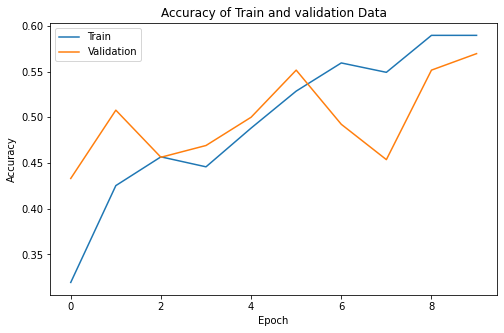

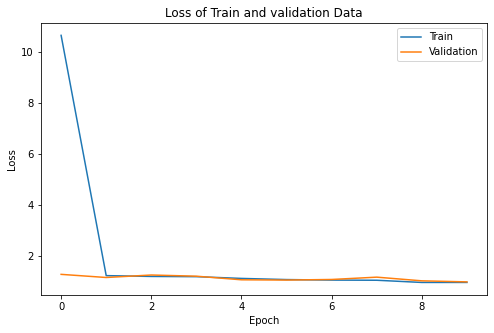

In [ ]:
print_results(model,un_shuffled_train_data, un_shuffled_validation_data )
plot_results(history_relu_adam)

The result is somehow the same with using SGD.

##Effect of Epoch
### Epoch = 20

In [ ]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(4096, activation='relu')(output)
output = keras.layers.Dense(2048, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu_adam_20_epoch = model.fit(train_data, validation_data=validation_data , epochs=20)

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_41 (Flatten)        (None, 10000)             0         
                                                                 
 dense_124 (Dense)           (None, 2048)              20482048  
                                                                 
 dense_125 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_126 (Dense)           (None, 4)                 4100      
                                                                 
Total params: 22,584,324
Trainable params: 22,584,324
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 8/43 [====>.......................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 57s 1s/step - loss: 4.8584 - accuracy: 0.3199 - val_loss: 1.4315 - val_accuracy: 0.3093
Epoch 2/20
43/43 [==============================] - 56s 1s/step - loss: 1.3336 - accuracy: 0.3910 - val_loss: 1.1473 - val_accuracy: 0.4914
Epoch 3/20
43/43 [==============================] - 56s 1s/step - loss: 1.1729 - accuracy: 0.4864 - val_loss: 1.1883 - val_accuracy: 0.4381
Epoch 4/20
43/43 [==============================] - 56s 1s/step - loss: 1.1074 - accuracy: 0.5128 - val_loss: 1.1226 - val_accuracy: 0.4742
Epoch 5/20
43/43 [==============================] - 57s 1s/step - loss: 1.0963 - accuracy: 0.5187 - val_loss: 1.0793 - val_accuracy: 0.5137
Epoch 6/20
43/43 [==============================] - 57s 1s/step - loss: 1.0310 - accuracy: 0.5715 - val_loss: 1.0942 - val_accuracy: 0.5223
Epoch 7/20
43/43 [==============================] - 57s 1s/step - loss: 1.0509 - accuracy: 0.5378 - val_loss: 1.0264 - val_accuracy: 0.5258
Epoch 8/20
43/43 [=============

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.79      0.80      0.80       365
           1       0.89      0.93      0.91       324
           2       0.83      0.93      0.88       355
           3       0.92      0.74      0.82       319

    accuracy                           0.85      1363
   macro avg       0.86      0.85      0.85      1363
weighted avg       0.86      0.85      0.85      1363

---->Validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.60      0.60      0.60       156
           1       0.69      0.76      0.72       138
           2       0.63      0.72      0.67       152
           3       0.83      0.60      0.70       136

    accuracy                           0.67       582
   macro avg       0.69      0.67      0.67       582
weighted avg       0.68      0.67      0.67       582



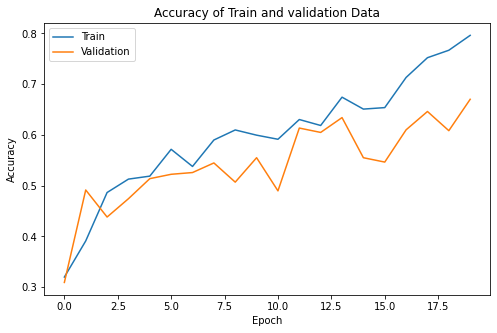

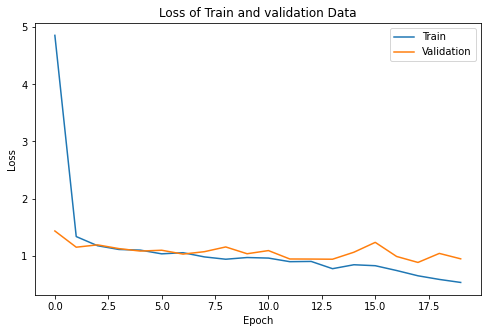

In [ ]:
print_results(model,un_shuffled_train_data, un_shuffled_validation_data)
plot_results(history_relu_adam_20_epoch)

**Question) why do we use different epochs? Is it necessary to train our model on different epochs?**

Epoch is the number of times that model will train through the entire training dataset. Training just one epoch can cause underfitting. So, we use multiple epochs. In some cases the learning algorithm may not be able to update its parameters  with the dataset or update good. Hence, we do the training proccess in multiple iterations to learn better. 

No, it is not necessary to use different epochs in all datsets. if we have enough data  that we can train the data good, we do not need number of epochs and we can achieve the optimal result in just one iteration. But we always do not have enough data in real life.

**Question) By which criteria we can detect overfitting?** 

One of them could be the accuracy. When the accuracy is getting higher but the accuracy on test dataset is gettin lower and lower, that is the point where overfitting is happening. Also, the other criterion is loss value. when after some epochs, the loss on train data set is getting lower and the loss on test daat set is getting higher and higher, in that point overfitting occured.

**Question) Is it always useful to employ a lot of epochs to train the network?**

Employing a lot of epochs may cause overfitting. This is beacause of the fac that our model learns the train data and even the noises very well that. Hence, it does not have good performance on the test data, although it has good performance and results on train data. One way to avoid overfitting is using early syopping methods. that is to stop training when the model is starting to overfitting. we can detect overfitting by the criterion I mentioned above.

In [99]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=8)


input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(4096, activation='relu')(output)
output = keras.layers.Dense(2048, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu_adam_20_epoch_early_stopping = model.fit(un_shuffled_train_data, validation_data=un_shuffled_validation_data , epochs=20, callbacks=[early_stopping])

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_11 (Flatten)        (None, 10000)             0         
                                                                 
 dense_35 (Dense)            (None, 4096)              40964096  
                                                                 
 dense_36 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_37 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 49,362,948
Trainable params: 49,362,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
25/43 [================>...........

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 63s 1s/step - loss: 23.9385 - accuracy: 0.3309 - val_loss: 4.5585 - val_accuracy: 0.2337
Epoch 2/20
43/43 [==============================] - 60s 1s/step - loss: 1.6888 - accuracy: 0.2443 - val_loss: 1.3838 - val_accuracy: 0.2629
Epoch 3/20
43/43 [==============================] - 60s 1s/step - loss: 1.3795 - accuracy: 0.2634 - val_loss: 1.3661 - val_accuracy: 0.2852
Epoch 4/20
43/43 [==============================] - 61s 1s/step - loss: 1.3757 - accuracy: 0.2685 - val_loss: 1.3829 - val_accuracy: 0.2629
Epoch 5/20
43/43 [==============================] - 60s 1s/step - loss: 1.3801 - accuracy: 0.2663 - val_loss: 1.3813 - val_accuracy: 0.2646
Epoch 6/20
43/43 [==============================] - 60s 1s/step - loss: 1.3792 - accuracy: 0.2700 - val_loss: 1.3805 - val_accuracy: 0.2629
Epoch 7/20
43/43 [==============================] - 60s 1s/step - loss: 1.3762 - accuracy: 0.2715 - val_loss: 1.3775 - val_accuracy: 0.2715
Epoch 8/20
43/43 [============

With assigning patience to 3, the overfitting happend in epoch #17.

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

              precision    recall  f1-score   support

           0       0.78      0.05      0.09       365
           1       0.24      1.00      0.39       324
           2       1.00      0.01      0.01       355
           3       0.00      0.00      0.00       319

    accuracy                           0.25      1363
   macro avg       0.51      0.26      0.12      1363
weighted avg       0.53      0.25      0.12      1363

---->Test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

              precision    recall  f1-score   support

           0       0.82      0.06      0.11       156
           1       0.24      1.00      0.39       138
           2       1.00      0.01      0.01       152
           3       0.00      0.00      0.00       136

    accuracy                           0.25       582
   macro avg       0.52      0.27      0.13       582
weighted avg       0.54      0.25      0.12       582



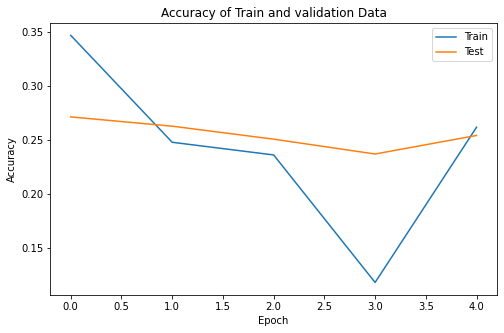

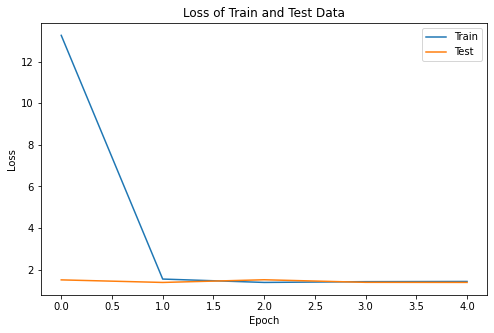

In [23]:
print_results(model,un_shuffled_train_data, un_shuffled_validation_data)
plot_results(history_relu_adam_20_epoch_early_stopping)

## Part 3: Effect of Loss Function
###MSE


**Question: why MSE is not good for classification problems? Where we use it?**

Mean squared error (MSE) is the most commonly used loss function for regression. Using MSE means that we assume that the underlying data has been generated from a normal distribution which in classification problems it is not always true. Also, as we are dealing with a classification problem the gradian of MSE  would be very small so the updates of weights would be very small, so the learning process would eventually stop.

In [ ]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(2048, activation='relu')(output)
output = keras.layers.Dense(1024, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error', 
    metrics=['accuracy']
)
model.summary()
history_relu_adam_mse = model.fit(train_data, validation_data=validation_data , epochs=10)

Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_43 (Flatten)        (None, 10000)             0         
                                                                 
 dense_130 (Dense)           (None, 2048)              20482048  
                                                                 
 dense_131 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_132 (Dense)           (None, 4)                 4100      
                                                                 
Total params: 22,584,324
Trainable params: 22,584,324
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 8/43 [====>.......................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 57s 1s/step - loss: 0.3628 - accuracy: 0.2641 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 2/20
43/43 [==============================] - 55s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 3/20
43/43 [==============================] - 55s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 4/20
43/43 [==============================] - 55s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 5/20
43/43 [==============================] - 57s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 6/20
43/43 [==============================] - 56s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 7/20
43/43 [==============================] - 55s 1s/step - loss: 0.3661 - accuracy: 0.2678 - val_loss: 0.3660 - val_accuracy: 0.2680
Epoch 8/20
43/43 [=============

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

              precision    recall  f1-score   support

           0       0.27      1.00      0.42       365
           1       0.00      0.00      0.00       324
           2       0.00      0.00      0.00       355
           3       0.00      0.00      0.00       319

    accuracy                           0.27      1363
   macro avg       0.07      0.25      0.11      1363
weighted avg       0.07      0.27      0.11      1363

---->Validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.27      1.00      0.42       156
           1       0.00      0.00      0.00       138
           2       0.00      0.00      0.00       152
           3       0.00      0.00      0.00       136

    accuracy                           0.27       582
   macro avg       0.07      0.25      0.11       582
weighted avg       0.07      0.27      0.11       582



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


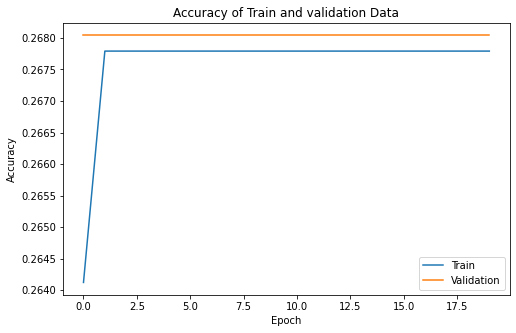

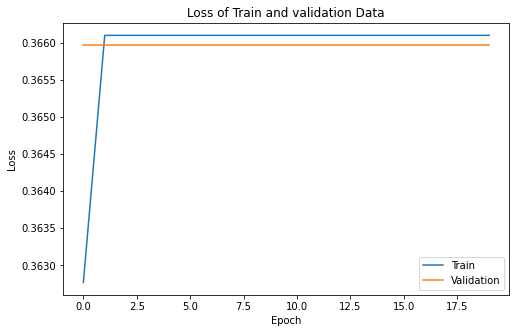

In [ ]:
print_results(model,un_shuffled_train_data, un_shuffled_validation_data )
plot_results(history_relu_adam_mse)

##Part 4) Effect of Regularization

In the domain of machine learning, regularization is the process which prevents overfitting. L2 or Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. 

### L2 = 0.0001

In [ ]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(2048, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.0001))(output)
output = keras.layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.0001))(output)
output = keras.layers.Dense(4, activation='softmax', kernel_regularizer=keras.regularizers.l2(l2=0.0001))(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu_adam_L2 = model.fit(train_data, validation_data=validation_data , epochs=20)

Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_44 (Flatten)        (None, 10000)             0         
                                                                 
 dense_133 (Dense)           (None, 2048)              20482048  
                                                                 
 dense_134 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_135 (Dense)           (None, 4)                 4100      
                                                                 
Total params: 22,584,324
Trainable params: 22,584,324
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
14/43 [========>...................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 61s 1s/step - loss: 5.5275 - accuracy: 0.2927 - val_loss: 1.7086 - val_accuracy: 0.4210
Epoch 2/20
43/43 [==============================] - 59s 1s/step - loss: 1.6468 - accuracy: 0.4028 - val_loss: 1.5723 - val_accuracy: 0.4124
Epoch 3/20
43/43 [==============================] - 59s 1s/step - loss: 1.5363 - accuracy: 0.4674 - val_loss: 1.6382 - val_accuracy: 0.4158
Epoch 4/20
43/43 [==============================] - 59s 1s/step - loss: 1.5016 - accuracy: 0.4652 - val_loss: 1.5228 - val_accuracy: 0.4536
Epoch 5/20
43/43 [==============================] - 59s 1s/step - loss: 1.4985 - accuracy: 0.4468 - val_loss: 1.4220 - val_accuracy: 0.4450
Epoch 6/20
43/43 [==============================] - 59s 1s/step - loss: 1.4068 - accuracy: 0.5150 - val_loss: 1.5523 - val_accuracy: 0.4588
Epoch 7/20
43/43 [==============================] - 61s 1s/step - loss: 1.3411 - accuracy: 0.5459 - val_loss: 1.3092 - val_accuracy: 0.5241
Epoch 8/20
43/43 [=============

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.62      0.95      0.75       365
           1       0.88      0.92      0.90       324
           2       0.86      0.95      0.90       355
           3       1.00      0.24      0.38       319

    accuracy                           0.78      1363
   macro avg       0.84      0.76      0.73      1363
weighted avg       0.83      0.78      0.74      1363

---->Validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.52      0.76      0.62       156
           1       0.71      0.71      0.71       138
           2       0.64      0.80      0.71       152
           3       0.92      0.18      0.30       136

    accuracy                           0.62       582
   macro avg       0.70      0.61      0.58       582
weighted avg       0.69      0.62      0.59       582



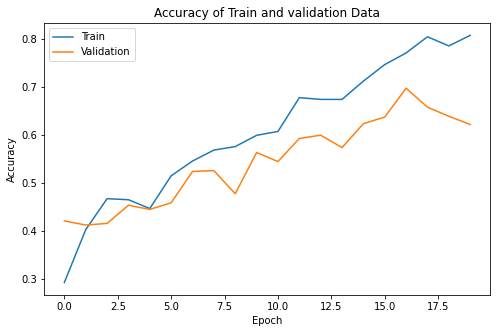

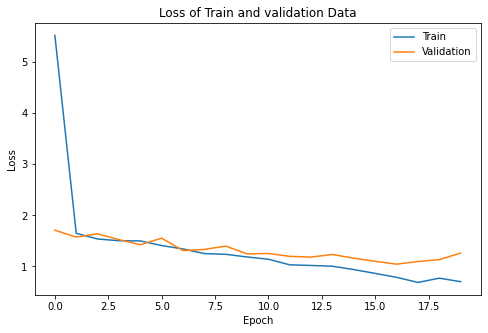

In [ ]:
print_results(model,un_shuffled_train_data, un_shuffled_validation_data )
plot_results(history_relu_adam_L2)

###Dropout = 0.1

We need dropout to **prevent overfitting**. Dropout refers to ignoring neurons during the training phase of certain set of neurons which is chosen at random. Ignoring means these units are not considered during a particular forward or backward pass. At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left.

In [ ]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(2048, activation='relu')(output)
output = layers.Dropout(0.1)(output)
output = keras.layers.Dense(1024, activation='relu')(output)
output = layers.Dropout(0.1)(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu_adam_dropout = model.fit(train_data, validation_data=validation_data , epochs=20)

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_46 (Flatten)        (None, 10000)             0         
                                                                 
 dense_139 (Dense)           (None, 2048)              20482048  
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_140 (Dense)           (None, 1024)              2098176   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_141 (Dense)           (None, 4)                 410

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 59s 1s/step - loss: 5.8466 - accuracy: 0.2935 - val_loss: 1.2729 - val_accuracy: 0.4141
Epoch 2/20
43/43 [==============================] - 57s 1s/step - loss: 1.3269 - accuracy: 0.4087 - val_loss: 1.2961 - val_accuracy: 0.3969
Epoch 3/20
43/43 [==============================] - 57s 1s/step - loss: 1.2296 - accuracy: 0.4351 - val_loss: 1.1849 - val_accuracy: 0.4622
Epoch 4/20
43/43 [==============================] - 57s 1s/step - loss: 1.1879 - accuracy: 0.4475 - val_loss: 1.1383 - val_accuracy: 0.4914
Epoch 5/20
43/43 [==============================] - 56s 1s/step - loss: 1.1546 - accuracy: 0.4762 - val_loss: 1.1032 - val_accuracy: 0.5189
Epoch 6/20
43/43 [==============================] - 56s 1s/step - loss: 1.1473 - accuracy: 0.4806 - val_loss: 1.1456 - val_accuracy: 0.4742
Epoch 7/20
43/43 [==============================] - 56s 1s/step - loss: 1.1283 - accuracy: 0.4923 - val_loss: 1.1081 - val_accuracy: 0.5000
Epoch 8/20
43/43 [=============

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.57      0.67      0.61       365
           1       0.76      0.76      0.76       324
           2       0.91      0.72      0.81       355
           3       0.71      0.72      0.72       319

    accuracy                           0.72      1363
   macro avg       0.74      0.72      0.72      1363
weighted avg       0.74      0.72      0.72      1363

---->Validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.46      0.60      0.52       156
           1       0.55      0.62      0.59       138
           2       0.82      0.53      0.64       152
           3       0.62      0.57      0.60       136

    accuracy                           0.58       582
   macro avg       0.61      0.58      0.59       582
weighted avg       0.61      0.58      0.58       582



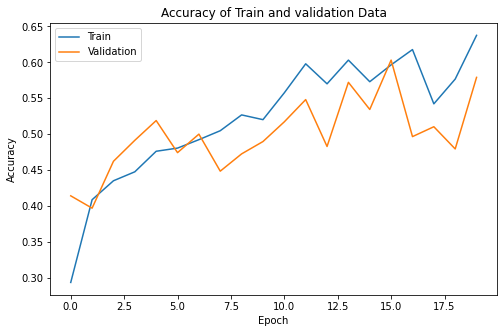

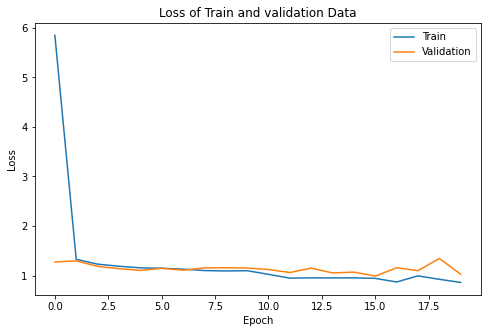

In [ ]:
print_results(model,un_shuffled_train_data, un_shuffled_validation_data )
plot_results(history_relu_adam_dropout)

As overfitting does not occure till epoch 20 using regularization methods does not effect drastically on this problem. ALthough te l2 method has givven us good results than dropout method.

### L2 = 0.0001 & Dropout = 0.1

In [ ]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(2048, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.0001))(output)
output = layers.Dropout(0.1)(output)
output = keras.layers.Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.0001))(output)
output = layers.Dropout(0.1)(output)
output = keras.layers.Dense(4, activation='softmax', kernel_regularizer=keras.regularizers.l2(l2=0.0001))(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu_adam_dropout_l2 = model.fit(train_data, validation_data=validation_data , epochs=20)

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_48 (Flatten)        (None, 10000)             0         
                                                                 
 dense_145 (Dense)           (None, 2048)              20482048  
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_146 (Dense)           (None, 1024)              2098176   
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_147 (Dense)           (None, 4)                 410

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 63s 1s/step - loss: 7.2531 - accuracy: 0.2568 - val_loss: 1.7316 - val_accuracy: 0.3832
Epoch 2/20
43/43 [==============================] - 61s 1s/step - loss: 1.7489 - accuracy: 0.3573 - val_loss: 1.6491 - val_accuracy: 0.4072
Epoch 3/20
43/43 [==============================] - 61s 1s/step - loss: 1.6134 - accuracy: 0.4175 - val_loss: 1.5204 - val_accuracy: 0.4674
Epoch 4/20
43/43 [==============================] - 61s 1s/step - loss: 1.5443 - accuracy: 0.4666 - val_loss: 1.5458 - val_accuracy: 0.4639
Epoch 5/20
43/43 [==============================] - 62s 1s/step - loss: 1.5046 - accuracy: 0.4894 - val_loss: 1.4533 - val_accuracy: 0.4674
Epoch 6/20
43/43 [==============================] - 61s 1s/step - loss: 1.4707 - accuracy: 0.4769 - val_loss: 1.4281 - val_accuracy: 0.4845
Epoch 7/20
43/43 [==============================] - 61s 1s/step - loss: 1.4307 - accuracy: 0.5077 - val_loss: 1.4151 - val_accuracy: 0.5155
Epoch 8/20
43/43 [=============

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.60      0.54      0.57       365
           1       0.56      0.90      0.69       324
           2       0.94      0.57      0.71       355
           3       0.69      0.66      0.67       319

    accuracy                           0.66      1363
   macro avg       0.70      0.66      0.66      1363
weighted avg       0.70      0.66      0.66      1363

---->Validation


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.47      0.48      0.48       156
           1       0.48      0.78      0.59       138
           2       0.72      0.38      0.50       152
           3       0.60      0.51      0.55       136

    accuracy                           0.53       582
   macro avg       0.57      0.54      0.53       582
weighted avg       0.57      0.53      0.53       582



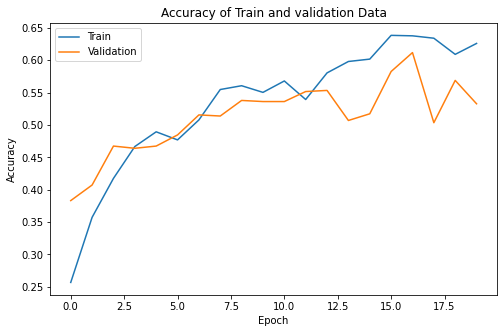

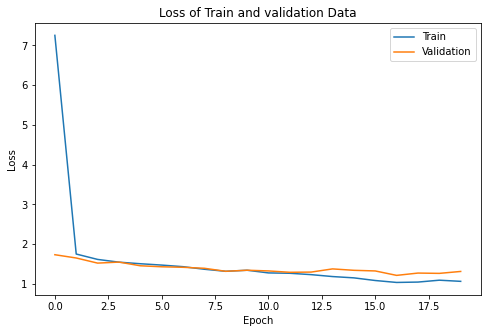

In [ ]:
print_results(model,un_shuffled_train_data, un_shuffled_validation_data )
plot_results(history_relu_adam_dropout_l2)

--------------------------

In [ ]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.0001))(output)
output = layers.Dropout(0.1)(output)
output = keras.layers.Dense(2048, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.0001))(output)
output = layers.Dropout(0.1)(output)
output = keras.layers.Dense(4, activation='softmax', kernel_regularizer=keras.regularizers.l2(l2=0.0001))(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu_adam_dropout_l2_4096 = model.fit(train_data, validation_data=validation_data , epochs=20)

Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_49 (Flatten)        (None, 10000)             0         
                                                                 
 dense_148 (Dense)           (None, 4096)              40964096  
                                                                 
 dropout_8 (Dropout)         (None, 4096)              0         
                                                                 
 dense_149 (Dense)           (None, 2048)              8390656   
                                                                 
 dropout_9 (Dropout)         (None, 2048)              0         
                                                                 
 dense_150 (Dense)           (None, 4)                 819

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 72s 2s/step - loss: 8.9614 - accuracy: 0.2986 - val_loss: 2.0536 - val_accuracy: 0.3625
Epoch 2/20
43/43 [==============================] - 71s 2s/step - loss: 2.0044 - accuracy: 0.3969 - val_loss: 1.8581 - val_accuracy: 0.4708
Epoch 3/20
43/43 [==============================] - 71s 2s/step - loss: 1.8723 - accuracy: 0.4307 - val_loss: 1.8447 - val_accuracy: 0.4124
Epoch 4/20
43/43 [==============================] - 70s 2s/step - loss: 1.7853 - accuracy: 0.4710 - val_loss: 1.7692 - val_accuracy: 0.4708
Epoch 5/20
43/43 [==============================] - 70s 2s/step - loss: 1.7159 - accuracy: 0.4615 - val_loss: 1.7614 - val_accuracy: 0.4467
Epoch 6/20
43/43 [==============================] - 70s 2s/step - loss: 1.6243 - accuracy: 0.5004 - val_loss: 1.5680 - val_accuracy: 0.5223
Epoch 7/20
43/43 [==============================] - 70s 2s/step - loss: 1.6105 - accuracy: 0.5011 - val_loss: 1.6850 - val_accuracy: 0.4674
Epoch 8/20
43/43 [=============

##Test

In [23]:
data_generator = preprocessing.image.ImageDataGenerator(
    rescale=1/255.0)

un_shuffled_all_train_data = data_generator.flow_from_directory(
    "/content/dataset/train",
    target_size=(100, 100),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=32,
    shuffle = False
)

all_train_data = data_generator.flow_from_directory(
    "/content/dataset/train",
    target_size=(100, 100),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=32,
)


un_shuffled_test_data = data_generator.flow_from_directory(
    "/content/dataset/test",
    target_size=(100, 100),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=32,
    shuffle = False
)

test_data = data_generator.flow_from_directory(
    "/content/dataset/test",
    target_size=(100, 100),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=32,
)

Found 1945 images belonging to 4 classes.
Found 1945 images belonging to 4 classes.
Found 833 images belonging to 4 classes.
Found 833 images belonging to 4 classes.


In [18]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(4096, activation='relu')(output)
output = keras.layers.Dense(2048, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

model = keras.models.Model(inputs=input, outputs=output)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
model.summary()
history_relu_adam_dropout_l2_test = model.fit(train_data, validation_data=test_data , epochs=20)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 dense_9 (Dense)             (None, 4096)              40964096  
                                                                 
 dense_10 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_11 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 49,362,948
Trainable params: 49,362,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 4/43 [=>...........................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 91s 2s/step - loss: 7.1182 - accuracy: 0.3382 - val_loss: 1.2292 - val_accuracy: 0.3866
Epoch 2/20
43/43 [==============================] - 72s 2s/step - loss: 1.2113 - accuracy: 0.4417 - val_loss: 1.4607 - val_accuracy: 0.3385
Epoch 3/20
43/43 [==============================] - 89s 2s/step - loss: 1.1809 - accuracy: 0.4409 - val_loss: 1.2684 - val_accuracy: 0.3962
Epoch 4/20
43/43 [==============================] - 72s 2s/step - loss: 1.1640 - accuracy: 0.4615 - val_loss: 1.1439 - val_accuracy: 0.4634
Epoch 5/20
43/43 [==============================] - 72s 2s/step - loss: 1.0652 - accuracy: 0.5033 - val_loss: 1.1689 - val_accuracy: 0.4898
Epoch 6/20
43/43 [==============================] - 89s 2s/step - loss: 1.0402 - accuracy: 0.5363 - val_loss: 1.3159 - val_accuracy: 0.4178
Epoch 7/20
43/43 [==============================] - 72s 2s/step - loss: 1.0390 - accuracy: 0.5312 - val_loss: 1.1178 - val_accuracy: 0.5030
Epoch 8/20
43/43 [=============

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.85      0.68      0.76       365
           1       0.73      0.95      0.82       324
           2       0.87      0.85      0.86       355
           3       0.91      0.85      0.88       319

    accuracy                           0.83      1363
   macro avg       0.84      0.83      0.83      1363
weighted avg       0.84      0.83      0.83      1363

---->Test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.64      0.47      0.55       156
           1       0.54      0.80      0.65       138
           2       0.70      0.61      0.65       152
           3       0.74      0.71      0.73       136

    accuracy                           0.64       582
   macro avg       0.66      0.65      0.64       582
weighted avg       0.66      0.64      0.64       582



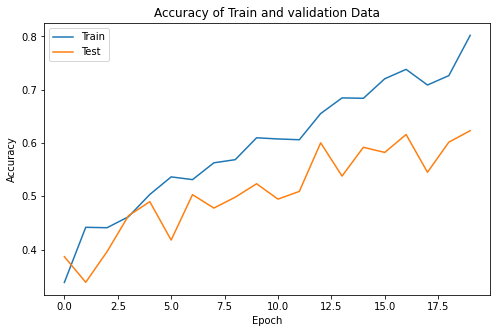

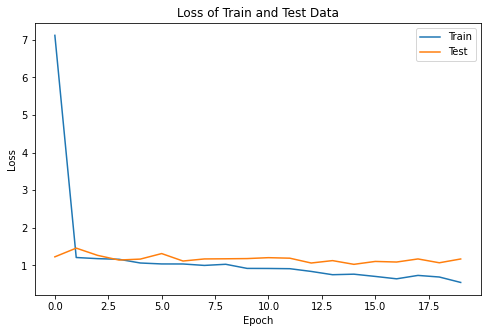

In [19]:
print_results(model,un_shuffled_train_data, un_shuffled_validation_data)
plot_results(history_relu_adam_dropout_l2_test)

As I mentioned above and also I tested again here, by adam optimizer I did not get good results so I decided to use SGD as optimizer.

In [20]:
test_data.class_indices

{'bald_eagle': 0, 'elk': 1, 'racoon': 2, 'raven': 3}

**Best Model**

In [104]:
input = keras.layers.Input(shape=(100,100,1))
output = keras.layers.Flatten()(input)
output = keras.layers.Dense(4096, activation='relu')(output)
output = keras.layers.Dense(2048, activation='relu')(output)
output = keras.layers.Dense(4, activation='softmax')(output)

best_model = keras.models.Model(inputs=input, outputs=output)

best_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.5), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
best_model.summary()
history_relu_bets = best_model.fit(train_data, validation_data=validation_data , epochs=20)

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 100, 100, 1)]     0         
                                                                 
 flatten_15 (Flatten)        (None, 10000)             0         
                                                                 
 dense_47 (Dense)            (None, 4096)              40964096  
                                                                 
 dense_48 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_49 (Dense)            (None, 4)                 8196      
                                                                 
Total params: 49,362,948
Trainable params: 49,362,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
10/43 [=====>......................

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 59s 1s/step - loss: 1.5774 - accuracy: 0.3720 - val_loss: 1.2137 - val_accuracy: 0.4880
Epoch 2/20
43/43 [==============================] - 58s 1s/step - loss: 1.1714 - accuracy: 0.4982 - val_loss: 1.2173 - val_accuracy: 0.4656
Epoch 3/20
43/43 [==============================] - 58s 1s/step - loss: 1.0688 - accuracy: 0.5444 - val_loss: 1.0626 - val_accuracy: 0.5361
Epoch 4/20
43/43 [==============================] - 63s 1s/step - loss: 1.0065 - accuracy: 0.6001 - val_loss: 0.9960 - val_accuracy: 0.6082
Epoch 5/20
43/43 [==============================] - 59s 1s/step - loss: 0.9603 - accuracy: 0.6222 - val_loss: 1.0551 - val_accuracy: 0.5704
Epoch 6/20
43/43 [==============================] - 59s 1s/step - loss: 0.9236 - accuracy: 0.6354 - val_loss: 0.9296 - val_accuracy: 0.6151
Epoch 7/20
43/43 [==============================] - 58s 1s/step - loss: 0.8314 - accuracy: 0.6853 - val_loss: 0.8779 - val_accuracy: 0.6564
Epoch 8/20
43/43 [=============

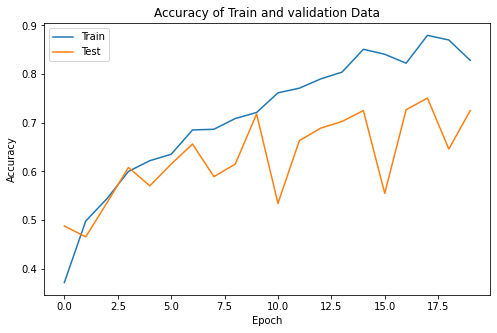

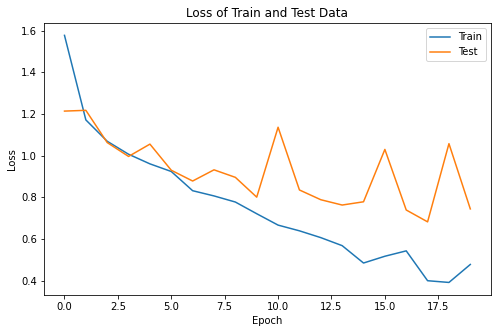

----->TRAIN


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.97      0.84      0.90       365
           1       0.88      1.00      0.94       324
           2       1.00      0.89      0.94       355
           3       0.83      0.95      0.89       319

    accuracy                           0.92      1363
   macro avg       0.92      0.92      0.92      1363
weighted avg       0.93      0.92      0.92      1363

---->Test


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


              precision    recall  f1-score   support

           0       0.81      0.58      0.67       223
           1       0.69      0.90      0.78       198
           2       0.84      0.63      0.72       217
           3       0.64      0.83      0.72       195

    accuracy                           0.73       833
   macro avg       0.74      0.73      0.73       833
weighted avg       0.75      0.73      0.72       833



In [105]:
plot_results(history_relu_bets)
print_results(best_model,un_shuffled_train_data, un_shuffled_test_data)

In [2]:
def print_results(modell, train_generator, validation_generator):
  print("----->TRAIN")
  pred = np.argmax(modell.predict(train_generator, batch_size=32), axis=1)
  print(classification_report(train_generator.labels, pred))
  print("---->Test")
  pred = np.argmax(modell.predict(validation_generator, batch_size=32), axis=1)
  print(classification_report(validation_generator.labels, pred))


def plot_results(hist):
  fig = plt.figure()
  fig.set_figheight(5)
  fig.set_figwidth(8)
  plt.plot(hist.history["accuracy"], label = "Train")
  plt.plot(hist.history["val_accuracy"], label ="Test")
  plt.title("Accuracy of Train and validation Data")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  fig = plt.figure()
  fig.set_figheight(5)
  fig.set_figwidth(8)
  plt.plot(hist.history["loss"], label = "Train")
  plt.plot(hist.history["val_loss"], Label = "Test")
  plt.title("Loss of Train and Test Data")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()


##Correct & Wrong Detections:

In [71]:
labels_string = ["Bald Eagle", "Elk", "Raccoon", "Raven"]

test_pred = np.argmax(model.predict(un_shuffled_test_data), axis=1)
test_true_class = un_shuffled_test_data.labels

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


###Correct prediction

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


True Label = Raccoon, Predicted Label = Raccoon


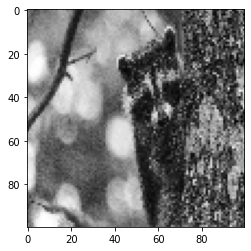

True Label = Raccoon, Predicted Label = Raccoon


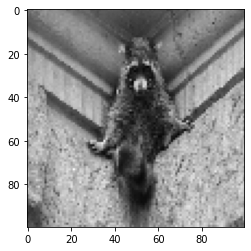

True Label = Raccoon, Predicted Label = Raccoon


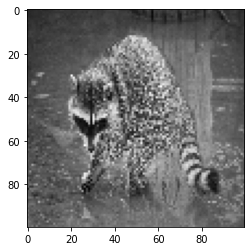

True Label = Raccoon, Predicted Label = Raccoon


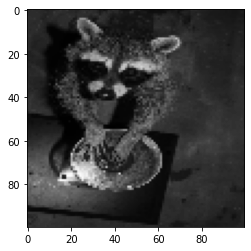

True Label = Raccoon, Predicted Label = Raccoon


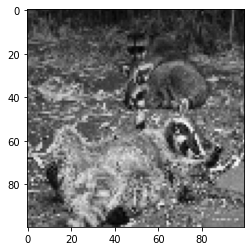

True Label = Raccoon, Predicted Label = Raccoon


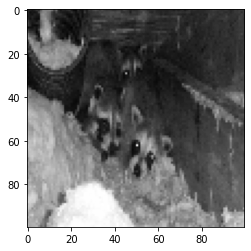

True Label = Raccoon, Predicted Label = Raccoon


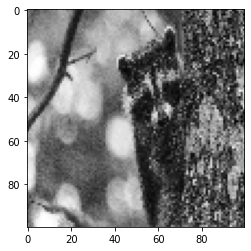

True Label = Raccoon, Predicted Label = Raccoon


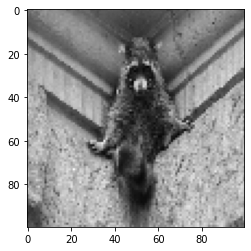

True Label = Raccoon, Predicted Label = Raccoon


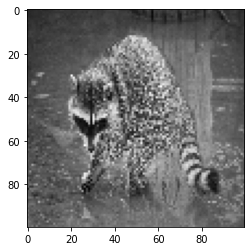

True Label = Raccoon, Predicted Label = Raccoon


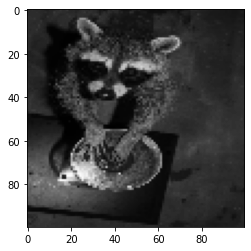

In [70]:
correct_predicted_images = 0
for images, labels in un_shuffled_test_data:
  if correct_predicted_images >= 10:
    break
  for i in range(0, len(labels), 50):
    if np.argmax(labels[i]) == test_pred[i]:
      print(f"True Label = {labels_string[np.argmax(labels[i])]}, Predicted Label = {labels_string[test_pred[i]]}")
      plt.imshow(images[i].reshape((100, 100)), cmap = 'gray')
      plt.show()
      correct_predicted_images += 1

###Wrong Predictions

True Label = Elk, Predicted Label = Raccoon


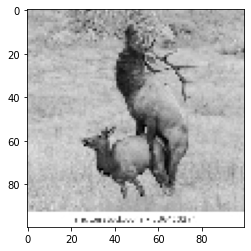

True Label = Elk, Predicted Label = Raccoon


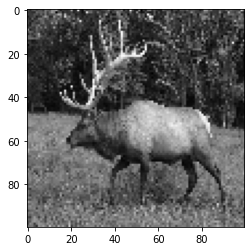

True Label = Elk, Predicted Label = Raccoon


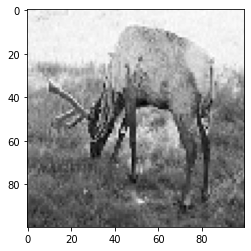

True Label = Elk, Predicted Label = Raccoon


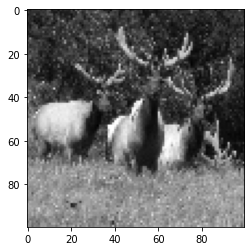

True Label = Elk, Predicted Label = Raccoon


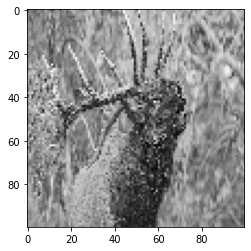

True Label = Elk, Predicted Label = Raccoon


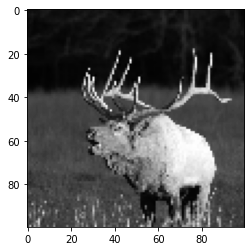

True Label = Elk, Predicted Label = Raccoon


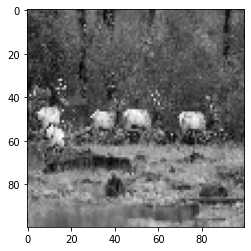

True Label = Elk, Predicted Label = Raccoon


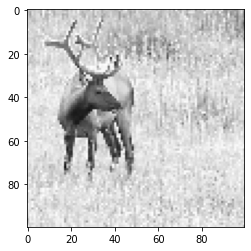

True Label = Elk, Predicted Label = Raccoon


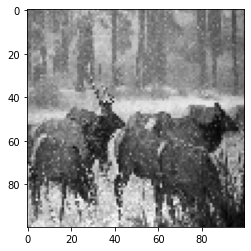

True Label = Elk, Predicted Label = Raccoon


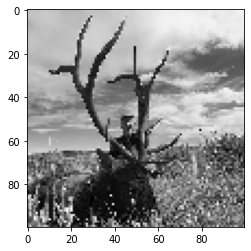

True Label = Elk, Predicted Label = Bald Eagle


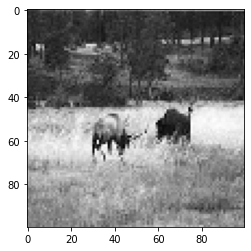

True Label = Elk, Predicted Label = Raccoon


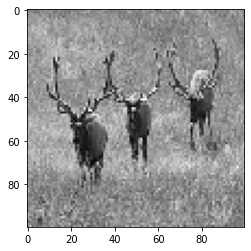

True Label = Elk, Predicted Label = Raccoon


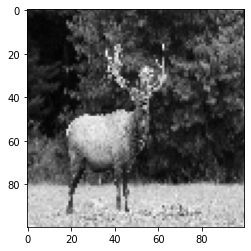

True Label = Elk, Predicted Label = Raccoon


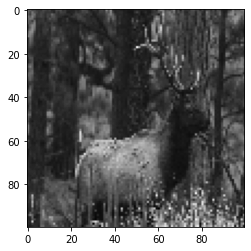

True Label = Elk, Predicted Label = Raccoon


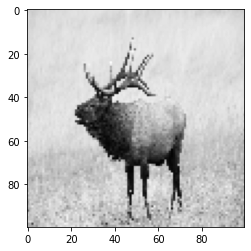

True Label = Elk, Predicted Label = Raccoon


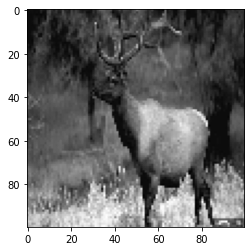

True Label = Elk, Predicted Label = Raccoon


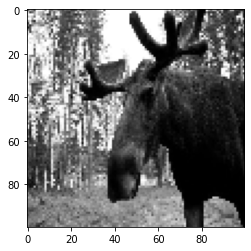

True Label = Elk, Predicted Label = Bald Eagle


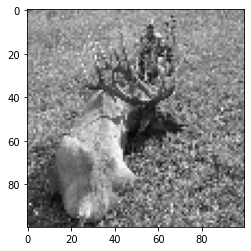

True Label = Elk, Predicted Label = Raccoon


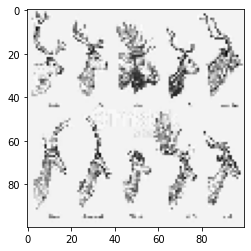

True Label = Elk, Predicted Label = Raccoon


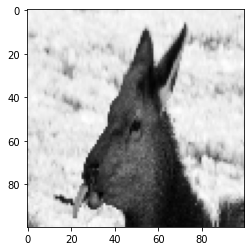

True Label = Elk, Predicted Label = Raccoon


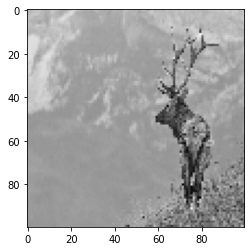

True Label = Elk, Predicted Label = Raccoon


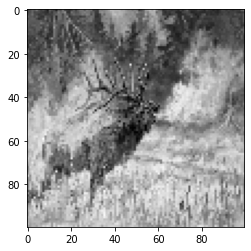

True Label = Elk, Predicted Label = Bald Eagle


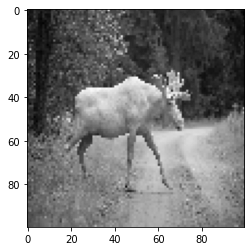

True Label = Elk, Predicted Label = Raccoon


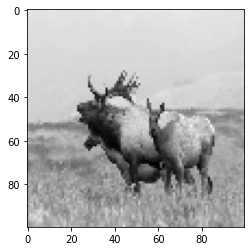

True Label = Elk, Predicted Label = Bald Eagle


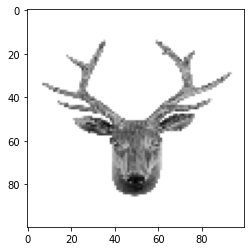

True Label = Elk, Predicted Label = Raccoon


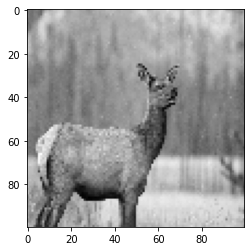

True Label = Elk, Predicted Label = Bald Eagle


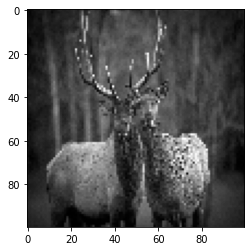

True Label = Elk, Predicted Label = Raccoon


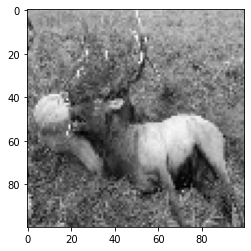

True Label = Elk, Predicted Label = Raccoon


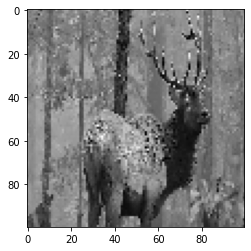

True Label = Elk, Predicted Label = Bald Eagle


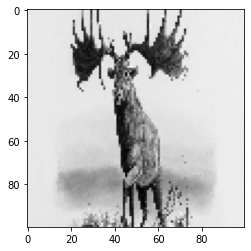

True Label = Elk, Predicted Label = Bald Eagle


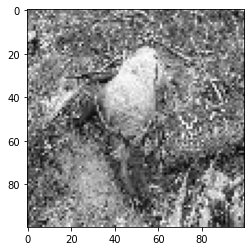

True Label = Elk, Predicted Label = Raccoon


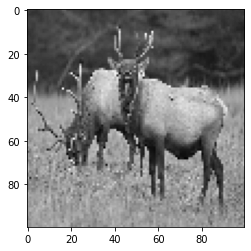

In [78]:
wrong_predicted_images = 0
for images, labels in un_shuffled_test_data:
  if wrong_predicted_images >= 10:
    break
  for i in range(len(labels)):
    if np.argmax(labels[i]) != test_pred[i]:
      print(f"True Label = {labels_string[np.argmax(labels[i])]}, Predicted Label = {labels_string[test_pred[i]]}")
      plt.imshow(images[i].reshape((100, 100)), cmap = 'gray')
      plt.show()
      wrong_predicted_images += 1

In some cases there are more than one animal in the picture or the picture is not just about the animal, I mean there other objects other than the animal like trees and other elements in nature. Also, Raven and Bald Eagle are so much alike so in some cases the cause of wrong prediction is this.

#Phase 4: Reducing Demension

An autoencoder is composed of an encoder and a decoder sub-models. The encoder compresses the input and the decoder attempts to recreate the input from the compressed version provided by the encoder. After training, the encoder model is saved and the decoder is discarded.

The encoder can then be used as a data preparation technique to perform feature extraction on raw data that can be used to train a different machine learning model.

In [86]:
input = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(4096 , activation = "LeakyReLU" , kernel_regularizer = regularizers.l2(l2 = 0.0001))(output)
output = layers.Dense(2048 , activation = "LeakyReLU" , kernel_regularizer = regularizers.l2(l2 = 0.0001))(output)
encoded = layers.Dense(2 , activation = "linear" , kernel_regularizer = regularizers.l2(l2 = 0.0001))(output)
decoded = layers.Dense(4 , activation = "softmax" , kernel_regularizer = regularizers.l2(l2 = 0.0001))(encoded)

auto_encoder_model = models.Model(inputs = input , outputs = decoded)

encoder_model = models.Model(inputs = input , outputs = encoded)

auto_encoder_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum = 0.5), 
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

history_encode = auto_encoder_model.fit(train_data, validation_data = validation_data, epochs = 20)

Epoch 1/20
 9/43 [=====>........................] - ETA: 36s - loss: 5.3926 - accuracy: 0.2361

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 68s 2s/step - loss: 2.8540 - accuracy: 0.3397 - val_loss: 2.1336 - val_accuracy: 0.4175
Epoch 2/20
43/43 [==============================] - 65s 2s/step - loss: 2.0975 - accuracy: 0.4314 - val_loss: 2.0892 - val_accuracy: 0.4416
Epoch 3/20
43/43 [==============================] - 65s 2s/step - loss: 2.0436 - accuracy: 0.4505 - val_loss: 2.1364 - val_accuracy: 0.3522
Epoch 4/20
43/43 [==============================] - 65s 2s/step - loss: 2.0003 - accuracy: 0.4806 - val_loss: 1.9988 - val_accuracy: 0.4759
Epoch 5/20
43/43 [==============================] - 65s 2s/step - loss: 1.9361 - accuracy: 0.5172 - val_loss: 2.0738 - val_accuracy: 0.3900
Epoch 6/20
43/43 [==============================] - 67s 2s/step - loss: 1.9294 - accuracy: 0.5363 - val_loss: 1.9380 - val_accuracy: 0.5275
Epoch 7/20
43/43 [==============================] - 68s 2s/step - loss: 1.9035 - accuracy: 0.5459 - val_loss: 1.9906 - val_accuracy: 0.4897
Epoch 8/20
43/43 [=============

In [97]:
encoder_pred_train = encoder_model.predict(un_shuffled_train_data, batch_size = 32)
encoder_pred_test = encoder_model.predict(un_shuffled_validation_data, batch_size = 32)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


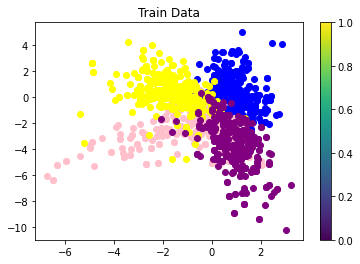

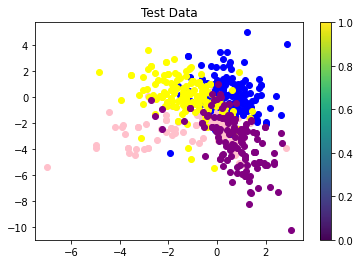

In [98]:
colors = ["pink" , "blue" , "yellow" , "purple"]

for i in range(len(encoder_pred_train)):
  plt.scatter(encoder_pred_train[i][0], encoder_pred_train[i][1], marker='o', color = colors[un_shuffled_train_data.classes[i]])
plt.title("Train Data")
plt.colorbar()
plt.show()

for i in range(len(encoder_pred_test)):
  plt.scatter(encoder_pred_test[i][0], encoder_pred_test[i][1], marker='o', color = colors[un_shuffled_validation_data.classes[i]])
plt.title("Test Data")
plt.colorbar()
plt.show()

Here I showed each class as following colors:

Blad Eagle => pink

Elk => blue

Raccoon => yellow

Raven => purple

As we can see from the plots above our model can understand the difference between raven and raccoon better, but for instance the differnec between raven and bald eagle is not that much noticable. Totally when the plots are not that much in common, classifying is easier. Also, at it is expected, the plot of train data is so much better and distinctable than the plot of test data.

##Conclusion

In this assignment I got familiar with `keras` and `TensorFlow`. Also, it helped me to get deeper in neural network concepts. I learned abour different hyperparamters and how parameters like regularization and optimizers can help us te create a better model. Now I have a better understanding of how differrent factors can effect on our model and how prevent overfitting.